# Mathematical morphology



In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
path = '/content/drive/MyDrive/2n UNI/3r Trimestre/Processament Imatges/Labs/Lab4/'
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Non-morphology: linear filters

> Añadir blockquote


Before moving on to the morphology framework, recall some linear filters, where an image is convolved with some kernel. It is useful because the morphology works in a similar way: in morphology the so called structuring elements are used to erode or dilate an image.

To run linear filters in python, we define a kernel and call function  convolve2d() from scipy package.
 Try the following kernels, which quite clearly show what can be done with linear filters. For example, the modulus of the gradient and Laplacian detect edges, the "high-pass" makes an image sharper, etc.



```
# Tiene formato de código
```

# Linear Filters

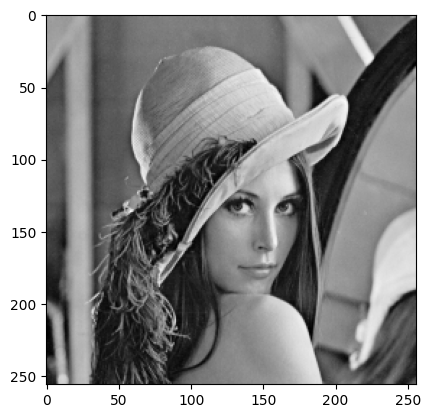

In [196]:
# first we read the image
lena = mpimg.imread(path+"lena.png")
plt.imshow(lena, cmap="gray")

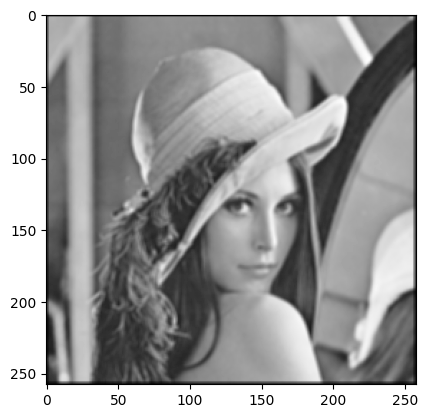

In [197]:
from scipy.signal import convolve2d
import numpy as np
# Mean filter
ksmooth = np.ones((3,3))
smooth_lena = convolve2d(lena, ksmooth/9.0)
plt.imshow(smooth_lena, cmap="gray")

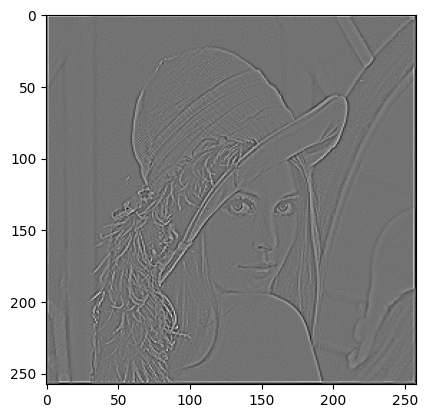

In [198]:
# Laplacian filter --> use for edge detector
Klaplacian = np.array([0,-1,0,-1,4,-1,0,-1,0]).reshape(3,3)
lena_edge = convolve2d(lena, Klaplacian)
plt.imshow(lena_edge, cmap="gray")

In [199]:
Klaplacian

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

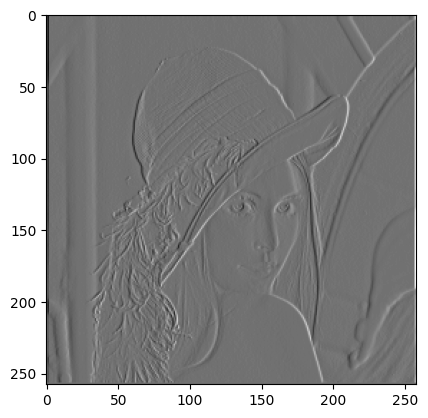

In [200]:
# Forward gradient
Kdx = np.array([0, 0, 0, 0, -1, 1, 0, 0, 0]).reshape(3,3)
plt.imshow(convolve2d(lena, Kdx), cmap="gray")

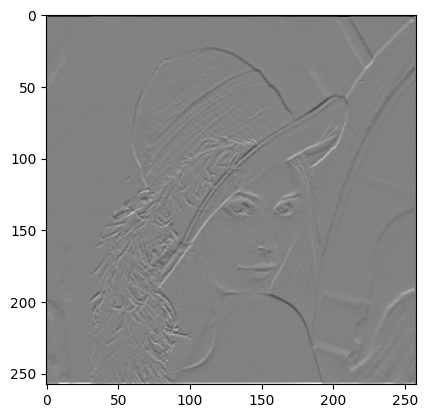

In [201]:
Kdy = np.array([0, 0, 0, 0, -1, 0, 0, 1, 0]).reshape(3,3)
plt.imshow(convolve2d(lena, Kdy), cmap="gray")

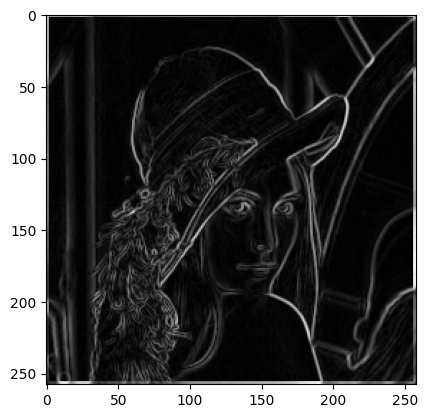

In [202]:
# Sobel filter to detect edges
Kdxsobel = np.array([-1, 0, 1, -2, 0, 2, -1, 0, 1]).reshape(3,3)
Kdysobel = np.array([-1, -2, -1, 0, 0, 0, 1, 2, 1]).reshape(3,3)
udx = convolve2d(lena, Kdxsobel)
udy = convolve2d(lena, Kdysobel)
# norm of the gradient
ugrad = np.sqrt(udx**2 + udy**2)
plt.imshow((ugrad-ugrad.min())/(ugrad.max()-ugrad.min()), cmap="gray")

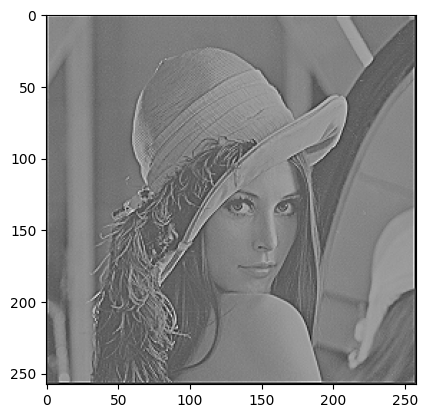

In [203]:
# High Pass Filter
Khipass = np.array([0, -1, 0, -1, 5, -1, 0, -1, 0]).reshape(3,3)
plt.imshow(convolve2d(lena, Khipass), cmap="gray")

# Morphological filters

The most important morphological filter is the binarization or thresholding. In Python, it might be implemented by inequality operators. From a given image u with gray values between 0 and 1 (in double), the following program creates a binary image containing the level set of level 0.5. In the theory notation, we have that :

 image.png

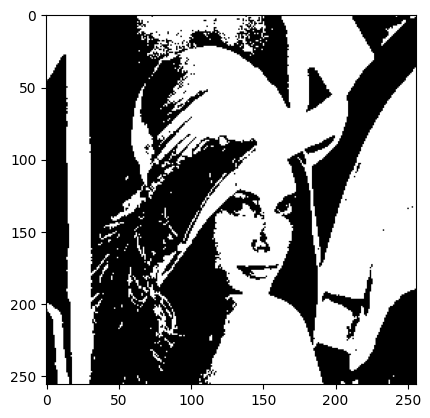

In [204]:
y = lena > 0.5
plt.imshow(y, cmap="gray")

In other words, an image with high values in every pixel position where the original image u has values greater then the thresholding level (level 0.5).

# Definition of Structural elements
The thresholding operation does not need a structuring element. All other morphological operators require a structuring element.
Here are some possible structuring elements:

In [205]:
SEsquare = np.ones((3,3))
SEsquare

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [206]:
SEcross  = np.array([0, 1, 0, 1, 1, 1, 0, 1, 0]).reshape(3,3)
SEcross

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [207]:
SEhoriz  = np.ones((1,10))
SEhoriz

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [208]:
SEvert = np.ones((10,1))
SEvert

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [209]:
SEsquare7 = np.ones((7,7))
SEsquare7

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In the lab, try to find the structural element that better fits to your problem.

> Añadir blockquote


Now we will define one structural element and apply several morphological filter.

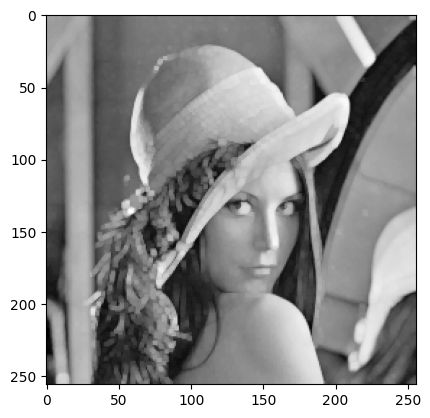

In [210]:
# Dilation
import cv2
se = np.ones((3,3))
dil_lena = cv2.dilate(lena, se, iterations=1)
plt.imshow(dil_lena, cmap="gray")

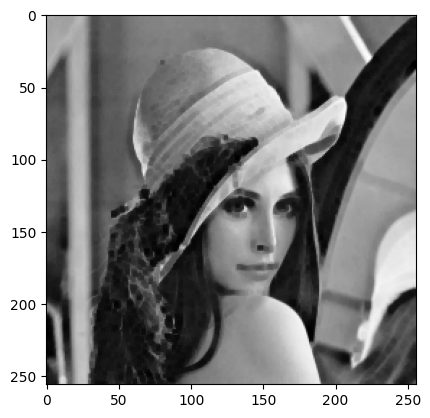

In [211]:
# Erosion
plt.imshow(cv2.erode(lena, se, iterations=1), cmap="gray")

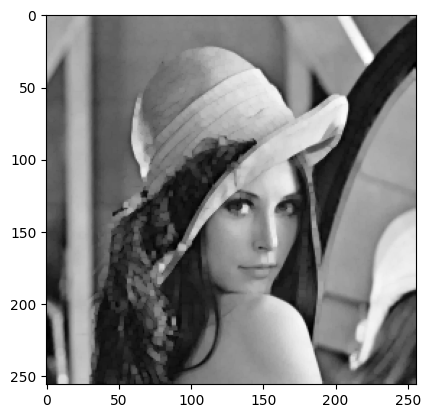

In [212]:
#Opening
plt.imshow(cv2.dilate(cv2.erode(lena, se, iterations=1),se, iterations=1), cmap="gray")

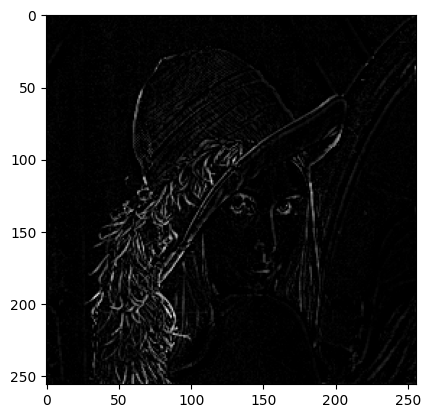

In [213]:
 # Top Hat - residue of opening
 plt.imshow(lena - cv2.dilate(cv2.erode(lena, se, iterations=1),se, iterations=1), cmap="gray")

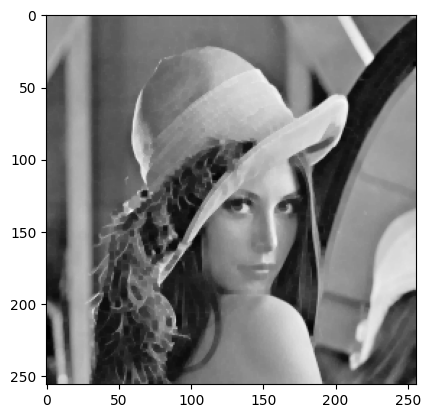

In [214]:
# Closing
plt.imshow(cv2.erode(cv2.dilate(lena, se, iterations=1),se, iterations=1), cmap="gray")

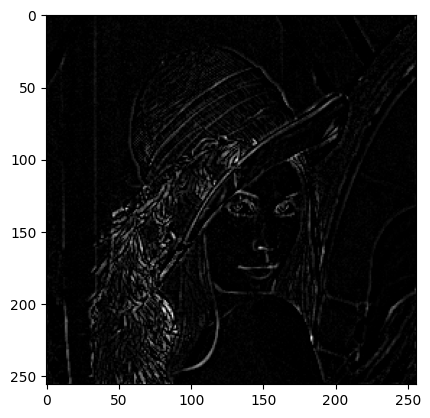

In [215]:
# Bottom Hat - residue of closing
plt.imshow(cv2.erode(cv2.dilate(lena, se, iterations=1),se, iterations=1) - lena, cmap="gray")

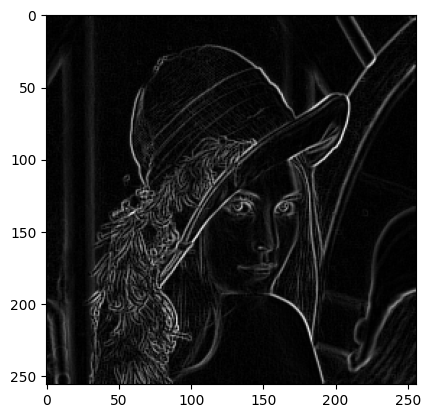

In [216]:
# Advanced Morph Gradient
plt.imshow(cv2.dilate(lena, se, iterations=1) - lena, cmap="gray")

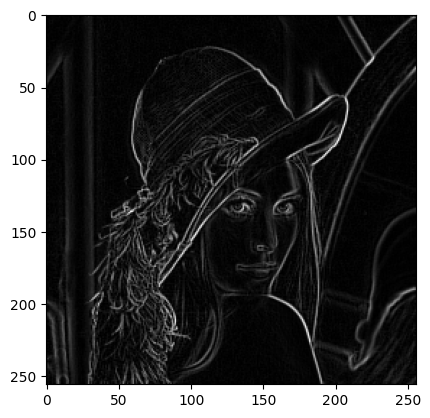

In [217]:
# Delayed Morph Gradient
plt.imshow(lena - cv2.erode(lena, se, iterations=1), cmap="gray")

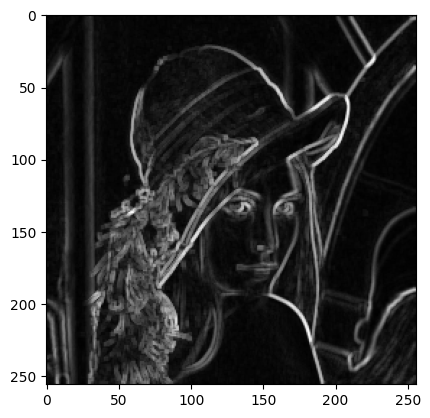

In [218]:
# Central Morph Gradient
plt.imshow(cv2.dilate(lena, se, iterations=1) - cv2.erode(lena, se, iterations=1), cmap="gray")

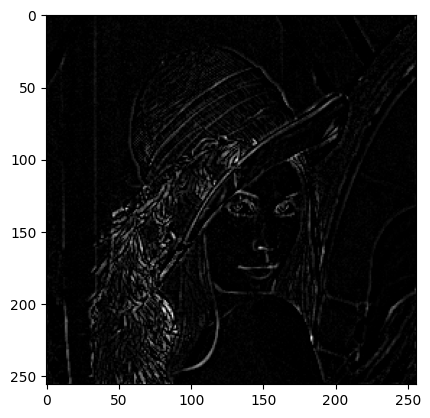

In [219]:
# Bottom Hat - residue of closing
plt.imshow(cv2.erode(cv2.dilate(lena, se, iterations=1),se, iterations=1) - lena, cmap="gray")

Try all these filters with different structuring elements, until you get the understanding of the effect of each of them.

An Example of applying Gaussian noise on an image. This example would be very useful for exercise 3, where you need to draw an alphabet and apply gaussian noise and then create your own function to remove the noise in order to retrieve the edges of the letter.

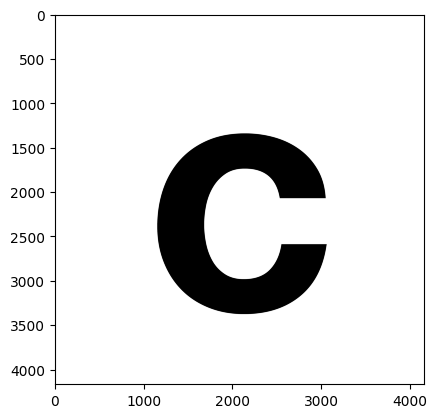

In [220]:
letter_c = mpimg.imread(path+"letter_c.png")
plt.imshow(letter_c, cmap="gray")

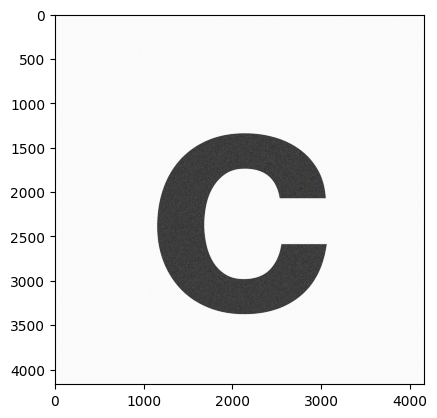

In [221]:
from skimage.util import random_noise
letter_c = np.uint8(letter_c * 255) #remeber that both letter and noise need to be in the name data type so we convert it to uint8
noisy_c = random_noise(letter_c, mode='gaussian', mean=0, var=0.1)
plt.imshow(noisy_c, cmap="gray")

# Exercise 1

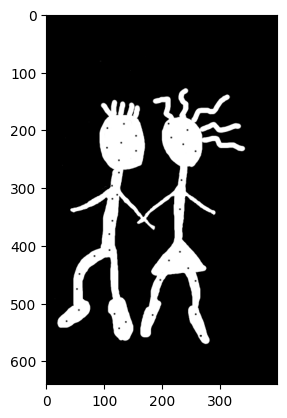

In [222]:
import cv2

foto = mpimg.imread(path+"Evarist.png")
plt.imshow(foto, cmap="gray")

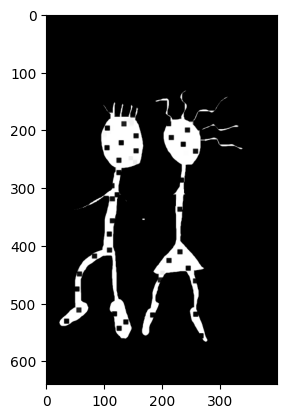

In [223]:
SE = np.ones((7,7))
foto1 = cv2.erode(foto, SE, iterations=1)
plt.imshow(foto1, cmap="gray")

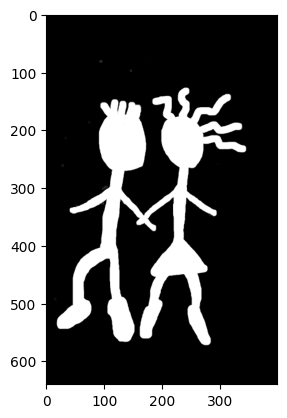

In [224]:
SE = np.ones((4,4))
foto2 = cv2.dilate(foto, SE, iterations=1)
plt.imshow(foto2, cmap="gray")

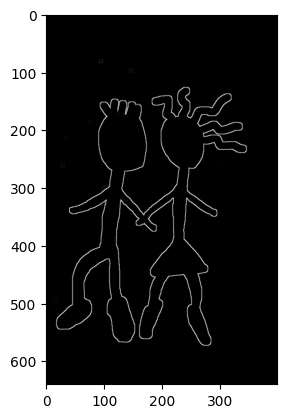

In [225]:
SE = np.ones((3,3))
foto3 = cv2.dilate(foto2, SE, iterations=1) - foto2
plt.imshow(foto3, cmap="gray")

# Exercise 2

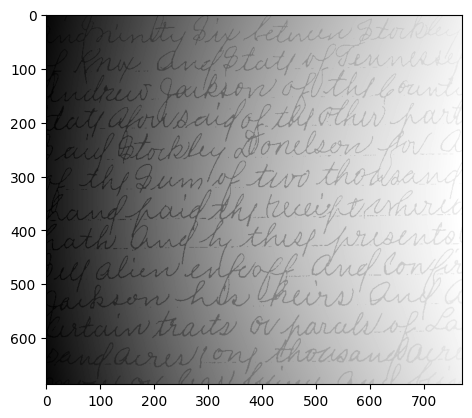

In [226]:
ex2 = mpimg.imread(path+"letters.png")
plt.imshow(ex2, cmap="gray")

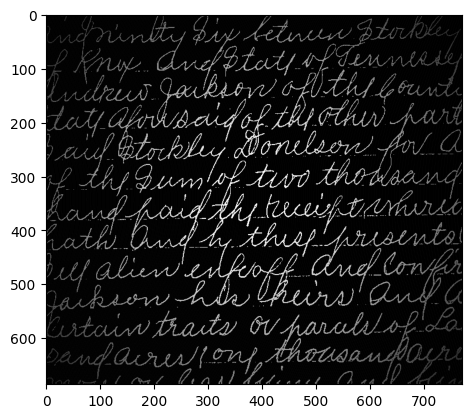

In [227]:
se = np.ones((4,4))
ex2_2 = ex2 - cv2.dilate(ex2, se, iterations=1)
ex2_2 = abs(ex2_2)
plt.imshow(ex2_2, cmap='gray')

In [228]:
ex2_2
ex2_3 = ex2_2 > 0.01
ex2_3

array([[False,  True,  True, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

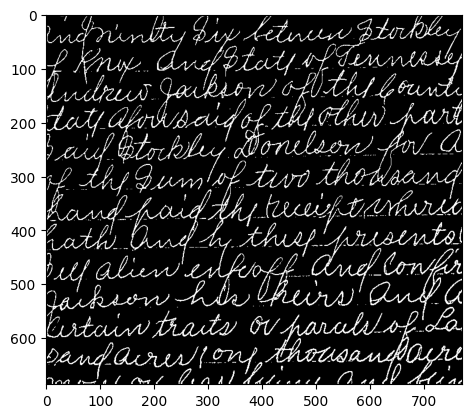

In [229]:
plt.imshow(ex2_3, cmap="gray")

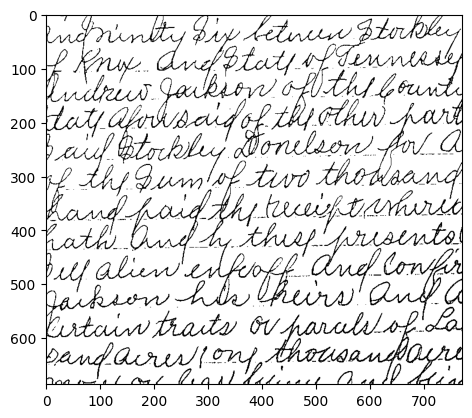

In [230]:
plt.imshow(1 - ex2_3, cmap = 'gray')

# Exercise 3

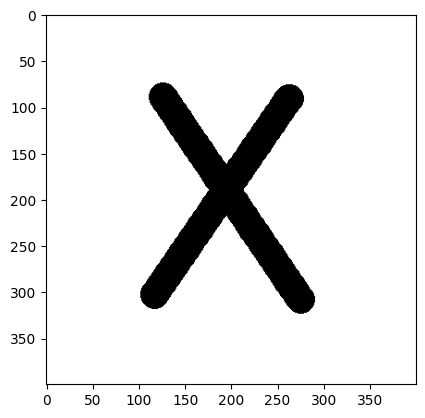

In [231]:
letter_X = cv2.imread(path+ "X.png", cv2.IMREAD_GRAYSCALE)  # Hem usat cv2 per guardar sa imatge en grayscale i que no se guardi en RGB
plt.imshow(letter_X, cmap="gray")

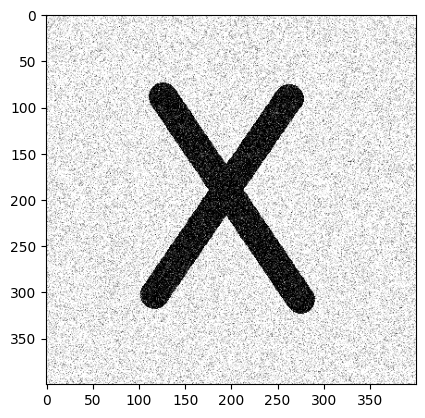

In [232]:
X_noisy = random_noise(letter_X, mode='gaussian', mean = 0, var = 0.05)
X_noisy = np.array(X_noisy * 255, dtype=np.uint8)
plt.imshow(X_noisy, cmap="gray")

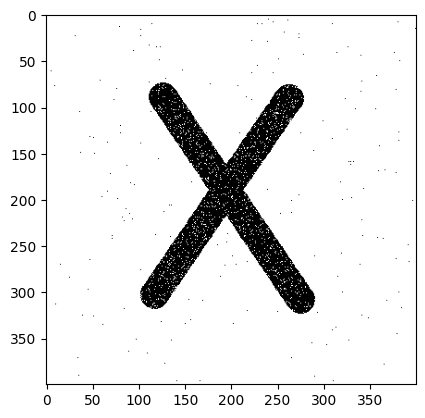

In [233]:
X_binary = (X_noisy > 80).astype(np.uint8) * 255
plt.imshow(X_binary, cmap="gray")

In [234]:
kernel = np.ones((3, 3), np.uint8)

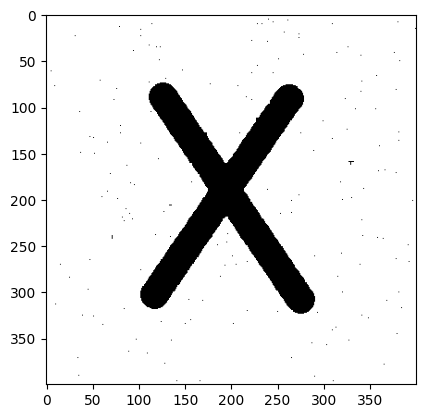

In [235]:
X_opened = cv2.dilate(cv2.erode(X_binary, kernel, iterations = 1), kernel, iterations = 1)
plt.imshow(X_opened, cmap = 'gray')

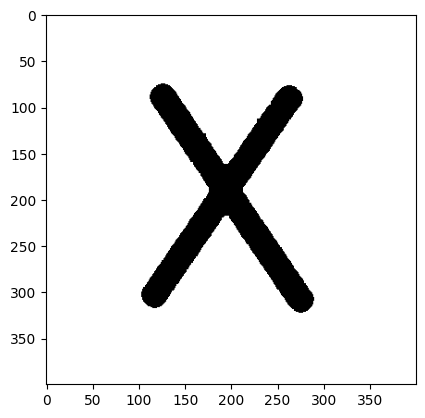

In [236]:
X_dilate = cv2.dilate(X_opened, kernel, iterations = 1)
plt.imshow(X_dilate, cmap = 'gray')

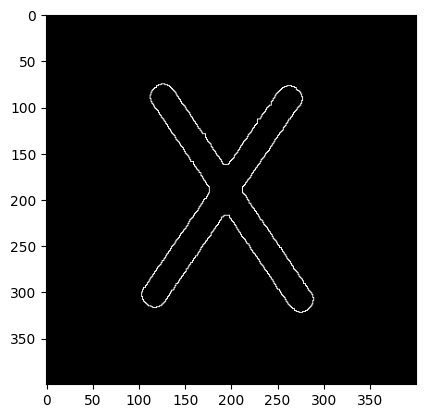

In [237]:
X_boundaries = cv2.dilate(X_dilate, kernel, iterations = 1) - X_dilate
plt.imshow(X_boundaries, cmap="gray")

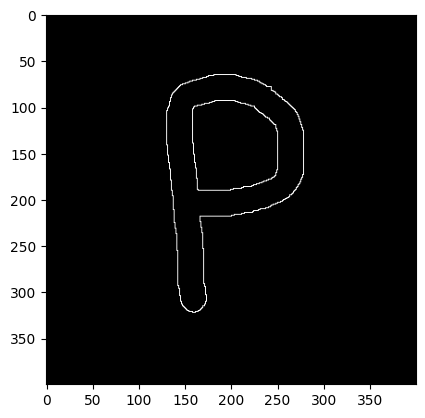

In [238]:
letter_P = cv2.imread(path+ "P.png", cv2.IMREAD_GRAYSCALE)

P_noisy = random_noise(letter_P, mode='gaussian', mean = 0, var = 0.05)
P_noisy = np.array(P_noisy * 255, dtype=np.uint8)

P_binary = (P_noisy > 80).astype(np.uint8) * 255

kernel = np.ones((3, 3), np.uint8)

P_opened = cv2.dilate(cv2.erode(P_binary, kernel, iterations = 1), kernel, iterations = 1)

P_dilate = cv2.dilate(P_opened, kernel, iterations = 1)

P_boundaries = cv2.dilate(P_dilate, kernel, iterations = 1) - P_dilate

plt.imshow(P_boundaries, cmap= 'gray')

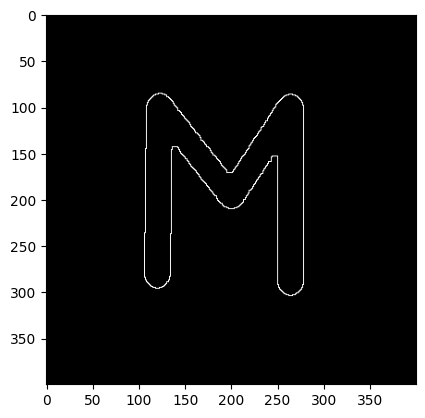

In [239]:
letter_M = cv2.imread(path+ "M.png", cv2.IMREAD_GRAYSCALE)

M_noisy = random_noise(letter_M, mode='gaussian', mean = 0, var = 0.05)
M_noisy = np.array(M_noisy * 255, dtype=np.uint8)

M_binary = (M_noisy > 80).astype(np.uint8) * 255

kernel = np.ones((3, 3), np.uint8)

M_opened = cv2.dilate(cv2.erode(M_binary, kernel, iterations = 1), kernel, iterations = 1)

M_dilate = cv2.dilate(M_opened, kernel, iterations = 1)

M_boundaries = cv2.dilate(M_dilate, kernel, iterations = 1) - M_dilate

plt.imshow(M_boundaries, cmap= 'gray')